In [1]:
#Importing all the required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as stats
import glob

In [6]:
#Consolidating all the individual csv files into one master csv file:

file_list = glob.glob('A-2/Rajasthan2/20??.xlsx')

list_of_dataframes=[]

for i in file_list:
    df=pd.read_excel(i)
    list_of_dataframes.append(df)

master_df = pd.concat(list_of_dataframes, ignore_index=True)

master_df = master_df.dropna(axis=1, how='all')

master_df
    


,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
0,2000,1,1,0,0,0,0,0,0,0,0,-6,13.139869,979.869812,25.129714,175.904030,3.062031
1,2000,1,1,1,0,0,0,0,0,0,0,-6,12.440472,979.790161,26.361047,168.137012,2.726701
2,2000,1,1,2,0,0,0,0,0,0,0,-6,11.831194,979.204224,27.478680,154.830289,2.388574
3,2000,1,1,3,0,0,0,0,0,0,0,-6,11.247913,979.035278,28.700628,141.414963,2.212896
4,2000,1,1,4,0,0,0,0,0,0,0,-6,10.715644,979.358093,30.032808,128.092585,2.151876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122635,2014,12,31,19,0,0,0,0,0,0,0,-6,16.161716,982.432617,19.766106,110.746285,2.846815
122636,2014,12,31,20,0,0,0,0,0,0,0,-6,15.350102,982.800537,21.323292,123.785588,3.155687
122637,2014,12,31,21,0,0,0,0,0,0,0,-6,14.573768,983.138550,23.054024,137.051598,3.456671
122638,2014,12,31,22,0,0,0,0,0,0,0,-5,13.777902,983.272095,24.979399,150.446122,3.645632


In [7]:
#Checking for NaN values:

(master_df==np.nan).sum()

#No NaN Values, so we move on...

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
DHI                   0
DNI                   0
GHI                   0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Wind Speed            0
dtype: int64

In [8]:
# Creating a datetime column:

master_df['Datetime_column'] = pd.to_datetime(master_df[['Year', 'Month', 'Day', 'Hour', 'Minute']], errors='coerce')

#setting the datetime column as the index:


master_df.set_index('Datetime_column', inplace=True)


master_df

#Therefore the dataset is prepared for EDA and descreptive statistics

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Speed
Datetime_column,,,,,,,,,,,,,,,,,
2000-01-01 00:00:00,2000,1,1,0,0,0,0,0,0,0,0,-6,13.139869,979.869812,25.129714,175.904030,3.062031
2000-01-01 01:00:00,2000,1,1,1,0,0,0,0,0,0,0,-6,12.440472,979.790161,26.361047,168.137012,2.726701
2000-01-01 02:00:00,2000,1,1,2,0,0,0,0,0,0,0,-6,11.831194,979.204224,27.478680,154.830289,2.388574
2000-01-01 03:00:00,2000,1,1,3,0,0,0,0,0,0,0,-6,11.247913,979.035278,28.700628,141.414963,2.212896
2000-01-01 04:00:00,2000,1,1,4,0,0,0,0,0,0,0,-6,10.715644,979.358093,30.032808,128.092585,2.151876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,0,0,0,0,0,0,0,-6,16.161716,982.432617,19.766106,110.746285,2.846815
2014-12-31 20:00:00,2014,12,31,20,0,0,0,0,0,0,0,-6,15.350102,982.800537,21.323292,123.785588,3.155687
2014-12-31 21:00:00,2014,12,31,21,0,0,0,0,0,0,0,-6,14.573768,983.138550,23.054024,137.051598,3.456671


In [9]:
# We choose to analyse the GHI column as it represents the total energy available to a typical solar park, making it the most important metric for forecasting energy generation.

# Descriptive statistics to understand the characterisitics of GHI data for the entirety of 15 years:

master_df["GHI"].describe()

#Results indicate that the GHI data is not normally distributed as mean>>median (50%tile)

count    122640.000000
mean        235.754525
std         313.645209
min           0.000000
25%           0.000000
50%           0.000000
75%         489.000000
max        1007.000000
Name: GHI, dtype: float64

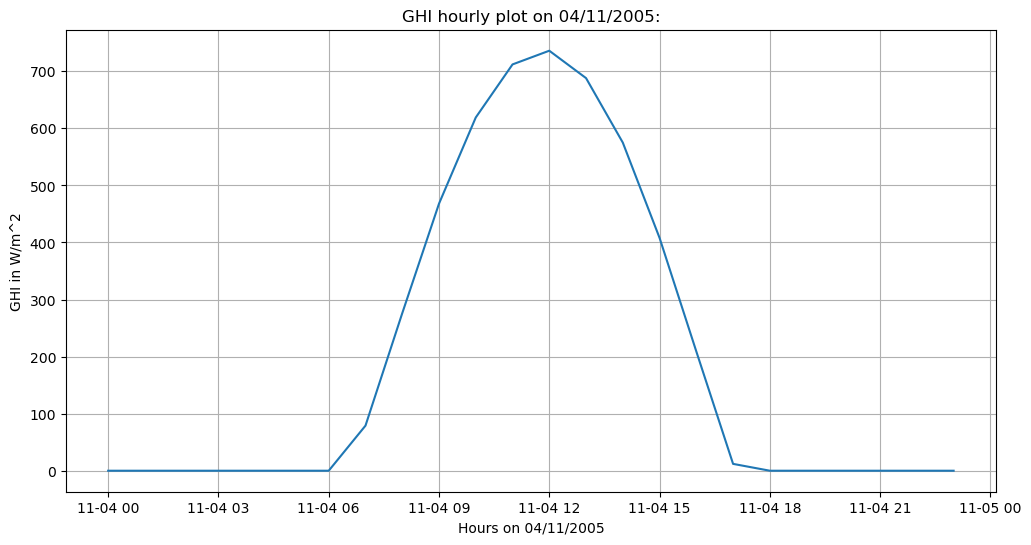

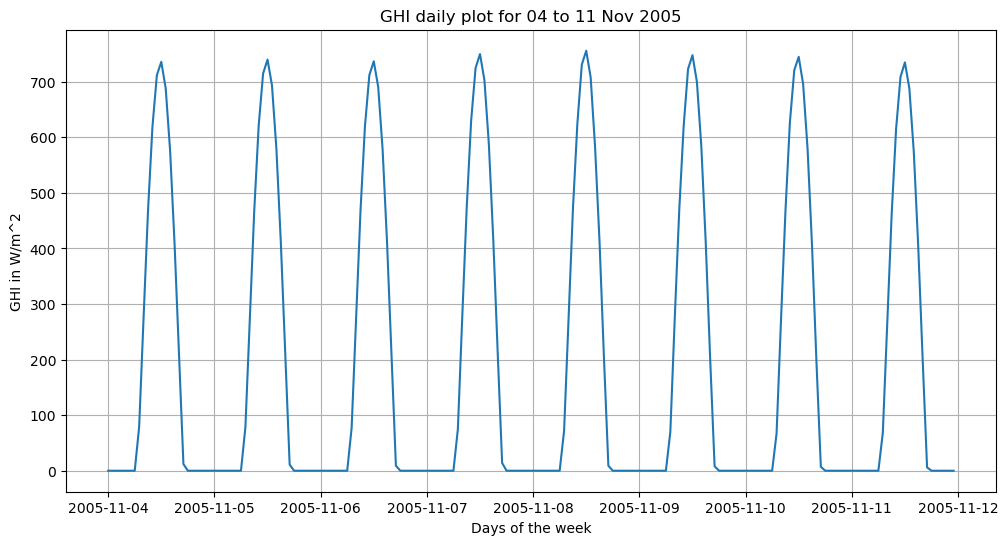

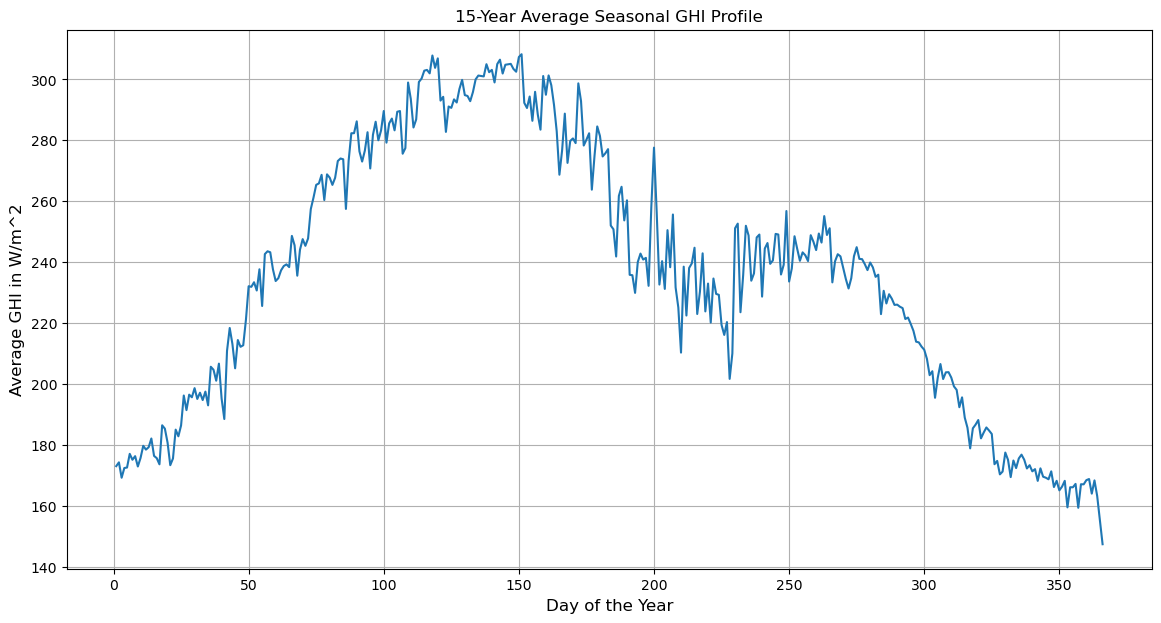

In [10]:
# Graphical Plots of GHI:

# The hourly variation of GHI on a randomly chosen day (say 04/11/2005):

X=master_df.loc["2005-11-04 00:00:00":"2005-11-04 23:00:00"]
Y=X['GHI']

plt.figure(figsize=(12, 6))
plt.xlabel("Hours on 04/11/2005")
plt.ylabel("GHI in W/m^2")
plt.title("GHI hourly plot on 04/11/2005:")
plt.grid(True)
plt.plot(X.index,Y)

# Inference: We see that GHI peeks exactly noon and is the least during the dusk and dawn

# The weekly variation of GHI on a randomly chosen week (say 04/11/2005 to 11/11/2005):

X=master_df.loc["2005-11-04 00:00:00":"2005-11-11 23:00:00"]
Y=X['GHI']

plt.figure(figsize=(12, 6))
plt.xlabel("Days of the week")
plt.ylabel("GHI in W/m^2")
plt.title("GHI daily plot for 04 to 11 Nov 2005")
plt.grid(True)
plt.plot(X.index,Y)

# Inference: We observe a seasonal pattern of peaks that seem to occur everyday around 12pm

# To observe the 15-Year Average Seasonal GHI Profile:

daily_df = master_df['GHI'].resample('D').mean()
daily_df = daily_df.to_frame()
daily_df['day_of_year'] = daily_df.index.dayofyear
seasonal_profile_df = daily_df.groupby('day_of_year')['GHI'].mean()

plt.figure(figsize=(14, 7))
seasonal_profile_df.plot()
plt.title("15-Year Average Seasonal GHI Profile")
plt.xlabel("Day of the Year", fontsize=12)
plt.ylabel("Average GHI in W/m^2", fontsize=12)
plt.grid(True)

# Inference: The GHI peaks during the summer days and slowly reduces on the onset of monsoon (sharp drop)

Correlation Matrix:
                        GHI       DNI       DHI  Temperature  \
GHI                1.000000  0.936608  0.909421     0.602081   
DNI                0.936608  1.000000  0.777440     0.485311   
DHI                0.909421  0.777440  1.000000     0.611414   
Temperature        0.602081  0.485311  0.611414     1.000000   
Relative Humidity -0.275426 -0.328623 -0.198609    -0.144698   

                   Relative Humidity  
GHI                        -0.275426  
DNI                        -0.328623  
DHI                        -0.198609  
Temperature                -0.144698  
Relative Humidity           1.000000  


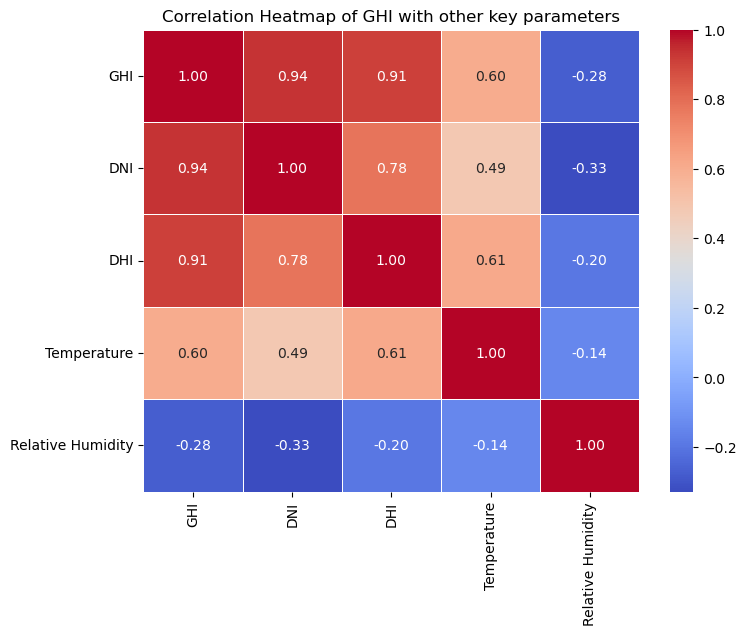

In [ ]:
# Correlation of GHI with other parameters like temperature, relative humidity, DNI among others

corr_mat=master_df[["GHI","DNI","DHI","Temperature","Relative Humidity"]].corr()
print("Correlation Matrix:")
print(corr_mat)

#Visualizing the correlation matrix using a heatmap:

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of GHI with other key parameters')
plt.show()

# Inference: GHI shows strong positive linear relationship with DNI and DHI as all three are different measures of irradiance.
# GHI also has positive corr with temperature as the hotter a day is, the more likely a high GHI (irradiance is obtained)
# GHI has a negative linear relationship with relative humidity because this is might be an indication of the amount of clouds present which will 
# definitely reduce the irradiance incident on a solar panel

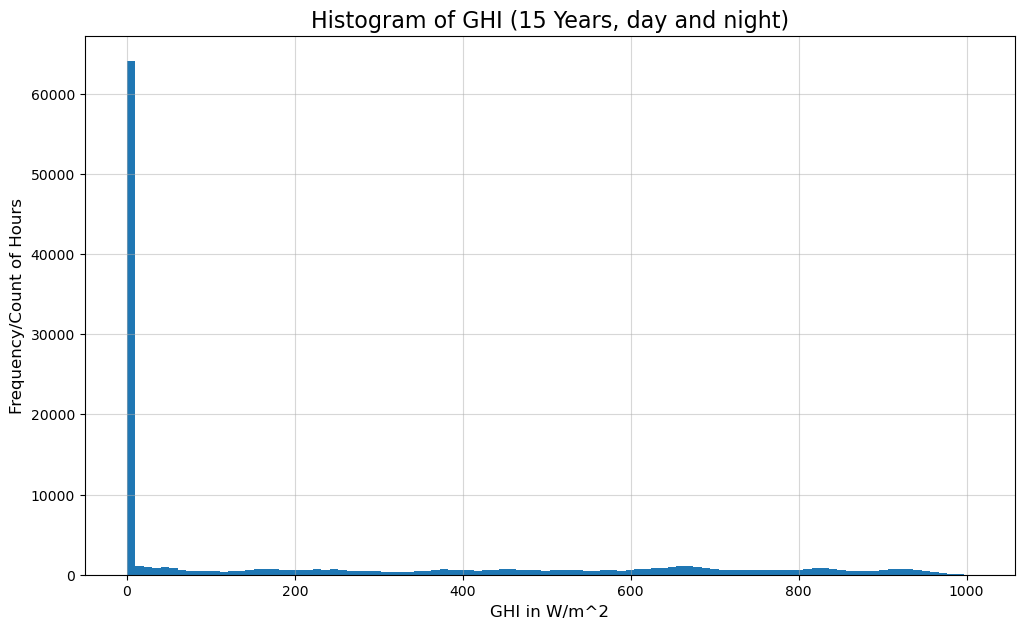

In [ ]:
# Plotting the histogram of GHI data:

plt.figure(figsize=(12, 7))
plt.hist(master_df['GHI'], bins=100)

plt.title("Histogram of GHI (15 years, day and night)", fontsize=16)
plt.xlabel("GHI in W/m^2", fontsize=12)
plt.ylabel("Frequency/Count of Hours", fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

# Inference: clearly, we see a massive spike at GHI=0 which is represenative of the GHI measured during night time
# implies that we need to remove the nighttime GHI data to properly analyse the type of distribution
# so we need to zoom in only on the daylight measures of GHI to analyze the distribution
# the data further looks to be heavily right skewed/positively skewed

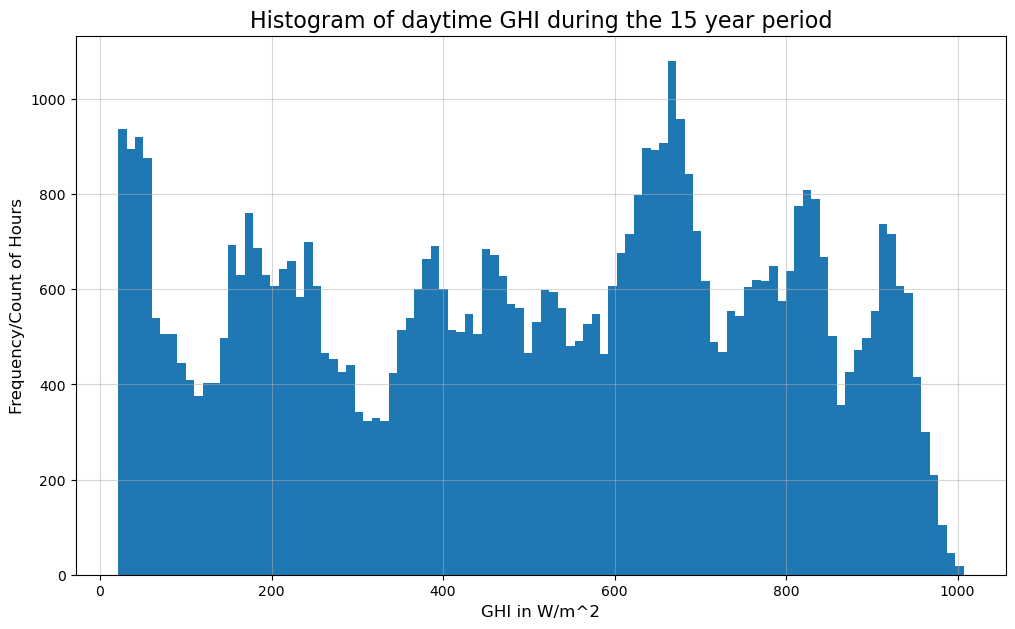

In [15]:
# PLotting the histogram only for the daytime GHI data:

daylight_ghi=master_df[master_df["GHI"]>20]
# We choose the threshhold value of 20 to
# a. avoid taking in noise (wrongly measured readings)
# b. to take into account only the meaningful sunlight in the non transition periods like noon (not dawn and dusk)
plt.figure(figsize=(12, 7))
plt.hist(daylight_ghi["GHI"], bins=100)

plt.title("Histogram of daytime GHI during the 15 year period", fontsize=16)
plt.xlabel("GHI in W/m^2", fontsize=12)
plt.ylabel("Frequency/Count of Hours", fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

# Inference:  Clearly the day time distribution of GHI does not seem to follow a normal, symmetric distibution
#  It has multiple different peaks, therefore can be considered a complex multimodal distribution

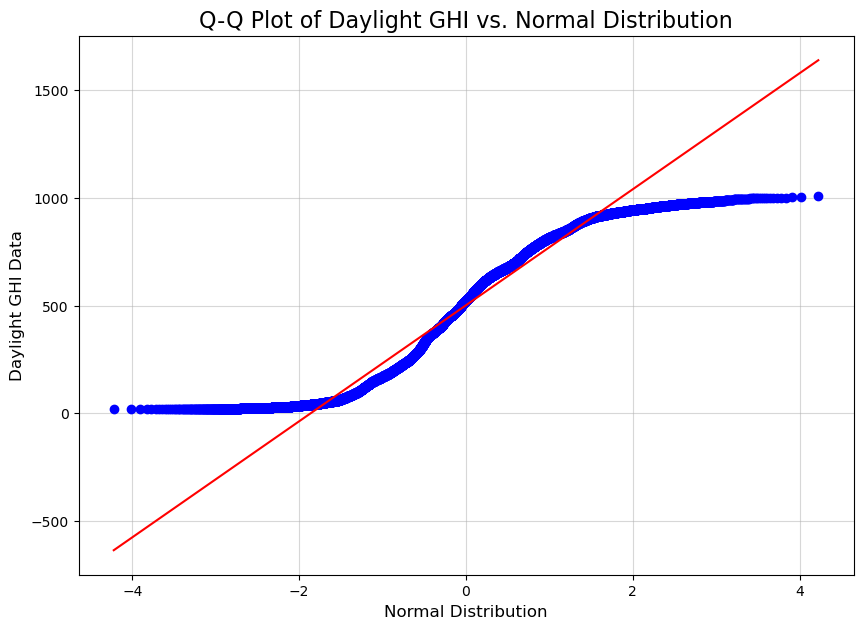

In [16]:
# Visual reverification using the  Q-Q (Quantile-Quantile) graph


plt.figure(figsize=(10, 7))
stats.probplot(daylight_ghi['GHI'], dist="norm", plot=plt)
# This compares daylight GHI with a normal distribution


plt.title("Q-Q Plot of Daylight GHI vs. Normal Distribution", fontsize=16)
plt.xlabel("Normal Distribution", fontsize=12)
plt.ylabel("Daylight GHI Data", fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()

# Since we observe that the GHI data (blue curve) does not follow the red line, it does not visually follow a normal distribution


In [17]:
# Shapiro Wilk test to statistically prove that the daylight GHI data is not normally distributed:

# H0: The daylight GHI is normally distributed
# H1: The daylight GHI is not normally distributed

# let alpha=0.05

# SW test is seen to take a long time to process for a large nu,ber of data points, so we randomly analyse for 5,000 points

if len(daylight_ghi['GHI']) > 5000:
    sample_data = daylight_ghi['GHI'].sample(5000)
else:
    sample_data = daylight_ghi['GHI']
# To take a random sample of 5000 points.
shapiro_stat, shapiro_p = stats.shapiro(sample_data)

print("Shapiro-Wilk Test Results")
print(f"Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")

print("\nHypotheses")
print("H0: The daylight GHI is normally distributed.")
print("H1: The daylight GHI is not normally distributed.")


alpha = 0.05  
print("\nConclusion")
if shapiro_p <= alpha:
    print(f"The p-value ({shapiro_p}) is less than the significance level of {alpha}.")
    print("Therefore, we reject H0")
    print("Thus, the daylight GHI data is not normally distributed.")
else:
    print(f"The p-value ({shapiro_p}) is greater than the significance level of {alpha}.")
    print("Therefore, we fail to reject H0")
    print("Thus, the GHI data appears to be normally distributed.")

Shapiro-Wilk Test Results
Test Statistic: 0.9551987943239644
P-value: 1.1690237560073875e-36

Hypotheses
H0: The daylight GHI is normally distributed.
H1: The daylight GHI is not normally distributed.

Conclusion
The p-value (1.1690237560073875e-36) is less than the significance level of 0.05.
Therefore, we reject H0
Thus, the daylight GHI data is not normally distributed.


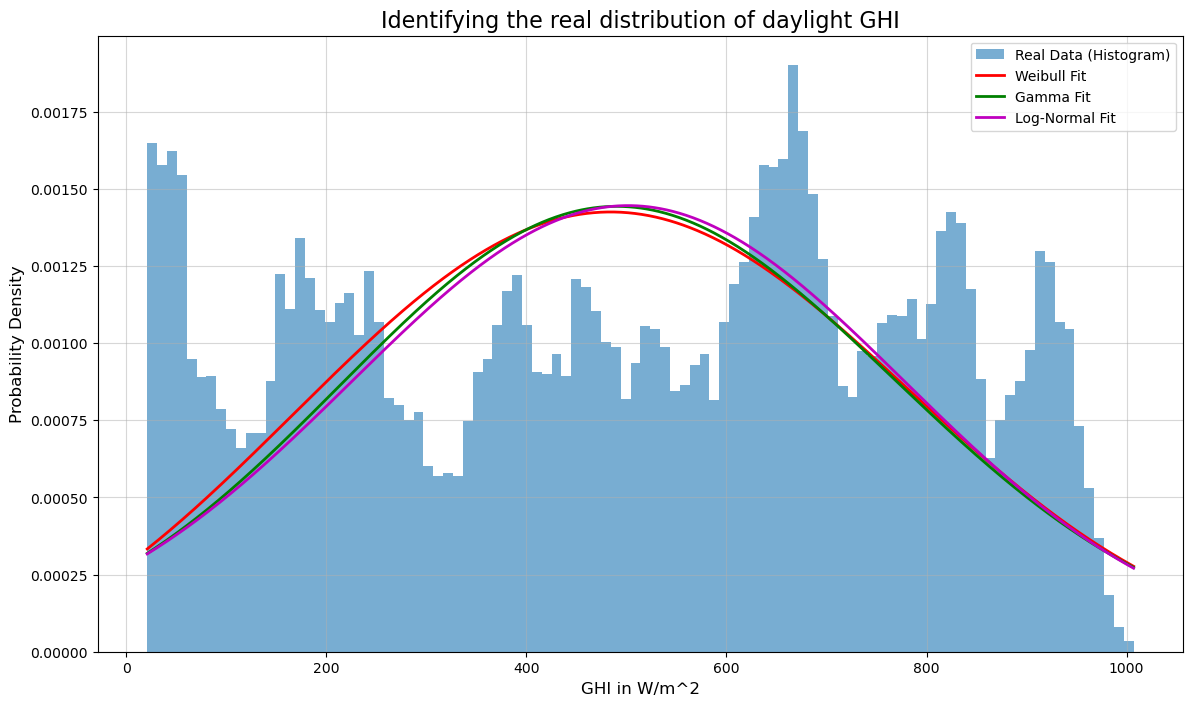

In [18]:
# To identify the distribution of daylight GHI data:
# We try to visually see which distribution that fits the histogram of daytime GHI
# We choose three distributions (Weibull, Gamma and Log-normal) for this visual analysis


(shape_w, loc_w, scale_w) = stats.weibull_min.fit(daylight_ghi['GHI'])
(shape_g, loc_g, scale_g) = stats.gamma.fit(daylight_ghi['GHI'])
(shape_l, loc_l, scale_l) = stats.lognorm.fit(daylight_ghi['GHI'])

plt.figure(figsize=(14, 8))
plt.hist(daylight_ghi['GHI'], bins=100, density=True, alpha=0.6, label='Real Data (Histogram)')
x_axis = np.linspace(daylight_ghi['GHI'].min(), daylight_ghi['GHI'].max(), 1000)

plt.plot(x_axis, stats.weibull_min.pdf(x_axis, shape_w, loc_w, scale_w), 'r-', lw=2, label='Weibull Fit')
plt.plot(x_axis, stats.gamma.pdf(x_axis, shape_g, loc_g, scale_g), 'g-', lw=2, label='Gamma Fit')
plt.plot(x_axis, stats.lognorm.pdf(x_axis, shape_l, loc_l, scale_l), 'm-', lw=2, label='Log-Normal Fit') # Added magenta line for Log-Normal

plt.title("Identifying the real distribution of daylight GHI", fontsize=16)
plt.xlabel("GHI in W/m^2", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# Inference: from the below plot, the daylight GHI does not seem to follow any of the standard distributions but rather
# seems to be a miixture of several different distributions
# None of the standard distributions seem to fit the complex real world daylight GHI data